# Regularized Regression

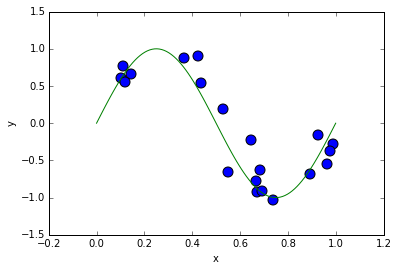

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

np.random.seed(0)

def f(x):
    return np.sin(2 * np.pi * x)

# generate points used to plot
x_plot = np.linspace(0, 1, 100)

# generate points and keep a subset of them
n_samples = 100
X = np.random.uniform(0, 1, size=n_samples)[:, np.newaxis]
y = f(X) + np.random.normal(scale=0.3, size=n_samples)[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

plt.scatter(X_train, y_train, s=100)

plt.plot(x_plot, f(x_plot), color='green')
plt.ylabel('y')
plt.xlabel('x')

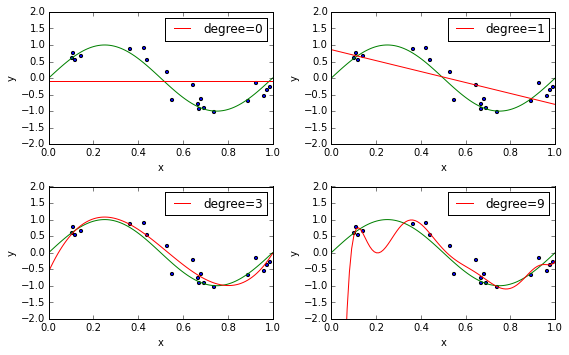

In [257]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

def plot_approximation(est, ax, poly, label=None):
    """Plot the approximation of ``est`` on axis ``ax``. """
    ax.plot(x_plot, f(x_plot), color='green')
    ax.scatter(X_train, y_train, s=10)
    ax.plot(x_plot, est.predict(poly.fit_transform(x_plot.reshape(len(x_plot),1))), color='red', label=label)
    ax.set_ylim((-2, 2))
    ax.set_xlim((0, 1))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='upper right')  #, fontsize='small')

fig, axes = plt.subplots(2, 2, figsize=(8, 5))

# fit different polynomials and plot approximations
for ax, degree in zip(axes.ravel(), [0, 1, 3, 9]):
    poly = PolynomialFeatures(degree)
    rgr = linear_model.LinearRegression()
    rgr.fit(poly.fit_transform(X_train),y_train)
    plot_approximation(rgr, ax, poly, label='degree=%d' % degree)

plt.tight_layout()

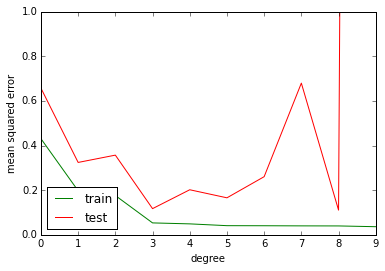

In [258]:
from sklearn.metrics import mean_squared_error

train_error = np.empty(10)
test_error = np.empty(10)
for degree in range(10):
    poly = PolynomialFeatures(degree)
    rgr = linear_model.LinearRegression()
    rgr.fit(poly.fit_transform(X_train),y_train)
    train_error[degree] = mean_squared_error(y_train, rgr.predict(poly.fit_transform(X_train)))
    test_error[degree] = mean_squared_error(y_test, rgr.predict(poly.fit_transform(X_test)))

plt.plot(np.arange(10), train_error, color='green', label='train')
plt.plot(np.arange(10), test_error, color='red', label='test')
plt.ylim((0.0, 1e0))
plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='lower left')

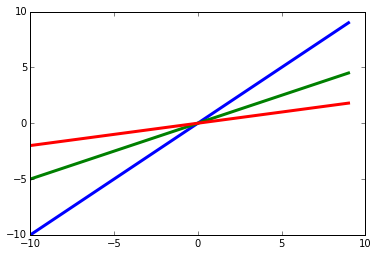

In [259]:
x = np.arange(-10,10)
plt.plot(x, x, color='blue',linewidth=3)
plt.plot(x, .5*x, color='green',linewidth=3)
plt.plot(x, .2*x, color='red',linewidth=3)

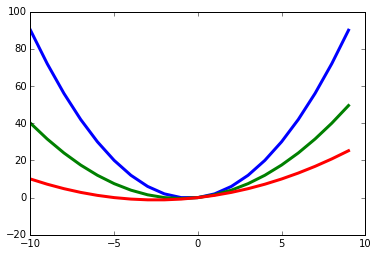

In [260]:
x = np.arange(-10,10)
plt.plot(x,x+ x**2, color='blue',linewidth=3)
plt.plot(x,x+ .5*x**2, color='green',linewidth=3)
plt.plot(x,x+ .2*x**2, color='red',linewidth=3)

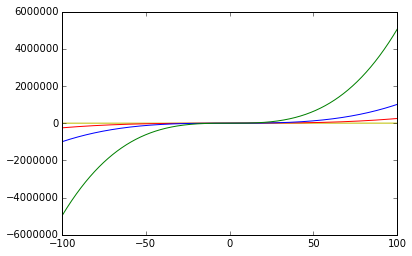

In [262]:
x = np.linspace(-100, 100, 2000)

plt.plot(x,x+.25*x**2+.001*x**3, c='y')
plt.plot(x,x+.25*x**2+.25*x**3, c='r')
plt.plot(x,x+x**2+x**3, c ='b')
plt.plot(x,x+5*x**2+5*x**3, c = 'g')

# Linear Regression Refresher
Extension of simple linear regression to several variables. $Y = \beta_0 + \beta_1X_1 + ... + \beta_pX_p + \epsilon$

* Estimate $\beta_0$,..., $\beta_p$ denote estimates by $\hat{\beta_0}$,...,$\hat{\beta_p}$
* Use estimates to make predictions $\hat{y}=\hat{\beta_0} + \hat{\beta_1}x_1 +...+ \hat{\beta_p}x_p $

How do we estimate $\beta_0$,..., $\beta_p$?
* Given a data set $(x_{1,1},..,x_{1,p}, y_1),(x_{2,1},..,x_{2,p},y_2),...,(x_{n,1},..,x_{n,p},y_n)$
* Minimize RSS

* For a given estimate define the residual as $e_i=y_i-\hat{y_i}$

<img src="RSS2.gif">
* Residual Sum Squares $(RSS) =\sum_i e^{2}_i$

* Objective: Find the $\beta_0$,...,$\beta_p$ that minimize Residual Sum Squares $(RSS) =\sum_i e^{2}_i$

# Ridge Regression
$\sum_i (y_i-\hat{y_i})^{2} + \alpha \sum_i \beta^{2}_i $

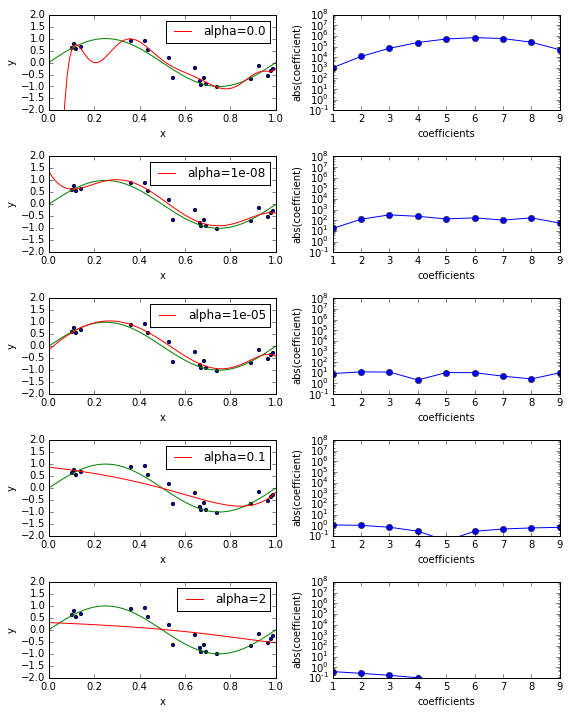

In [114]:
fig, ax_rows = plt.subplots(5, 2, figsize=(8, 10))

def plot_coefficients(est, ax, label=None, yscale='log'):
    coef = est.coef_.ravel()
    if yscale == 'log':
        ax.semilogy(np.abs(coef), marker='o', label=label)
        ax.set_ylim((1e-1, 1e8))
    else:
        ax.plot(np.abs(coef), marker='o', label=label)
    ax.set_ylabel('abs(coefficient)')
    ax.set_xlabel('coefficients')
    ax.set_xlim((1, 9))

degree = 9
alphas = [0.0, 1e-8, 1e-5, 1e-1,2]
for alpha, ax_row in zip(alphas, ax_rows):
    ax_left, ax_right = ax_row
    
    poly = PolynomialFeatures(degree)
    rgr = linear_model.Ridge(alpha=alpha, normalize = True)
    rgr.fit(poly.fit_transform(X_train),y_train)
    

    plot_approximation(rgr, ax_left,poly, label='alpha=%r' % alpha)
    plot_coefficients(rgr, ax_right, label='Ridge(alpha=%r) coefficients' % alpha)

    
    
plt.tight_layout()

# Lasso Regression
$\sum_i (y_i-\hat{y_i})^{2} + \alpha \sum_i |\beta_i| $

/Users/mike/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:29: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator


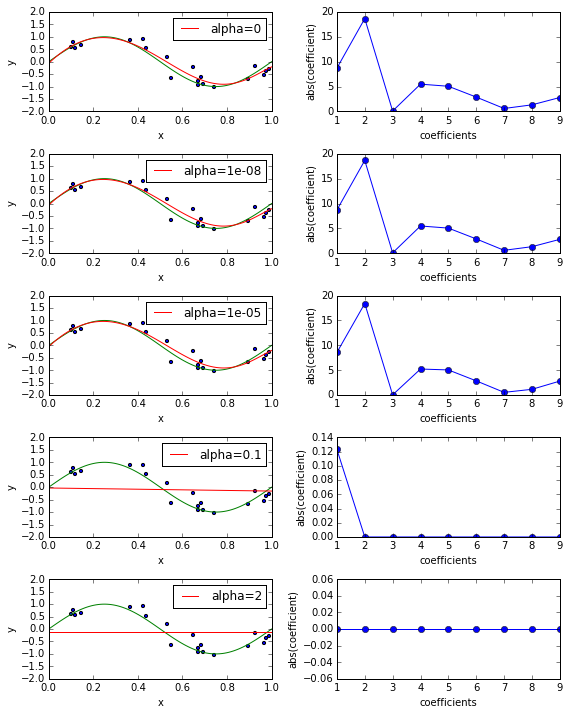

In [277]:
fig, ax_rows = plt.subplots(5, 2, figsize=(8, 10))


def plot_approximation(est, ax, poly, label=None):
    """Plot the approximation of ``est`` on axis ``ax``. """
    ax.plot(x_plot, f(x_plot), color='green')
    ax.scatter(X_train, y_train, s=10)
    ax.plot(x_plot, est.predict(poly.fit_transform(x_plot.reshape(len(x_plot),1))), color='red', label=label)
    ax.set_ylim((-2, 2))
    ax.set_xlim((0, 1))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='upper right')  #, fontsize='small')
    
def plot_coefficients(est, ax, label=None):
    coef = est.coef_.ravel()
    ax.plot(np.abs(coef), marker='o', label=label)
    ax.set_ylabel('abs(coefficient)')
    ax.set_xlabel('coefficients')
    ax.set_xlim((1, 9))

degree = 9
alphas = [0, 1e-8, 1e-5, 1e-1,2]
for alpha, ax_row in zip(alphas, ax_rows):
    ax_left, ax_right = ax_row
    
    poly = PolynomialFeatures(degree)
    rgr = linear_model.Lasso(alpha=alpha, normalize = True)
    rgr.fit(poly.fit_transform(X_train),y_train)

    plot_approximation(rgr, ax_left,poly, label='alpha=%r' % alpha)
    plot_coefficients(rgr, ax_right)

    
    
plt.tight_layout()

#### Ridge regression coefficients

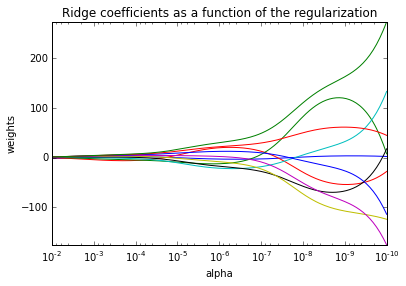

In [278]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# X is the 10x10 Hilbert matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

###############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)
clf = linear_model.Ridge(fit_intercept=False)

coefs = []
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)

###############################################################################
# Display results

ax = plt.gca()
ax.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm'])

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

#### Lasso regression coefficients

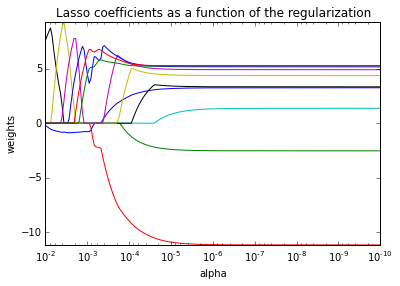

In [279]:
# X is the 10x10 Hilbert matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

###############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)
clf = linear_model.Lasso(fit_intercept=False)

coefs = []
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)

###############################################################################
# Display results

ax = plt.gca()
ax.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm'])

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

# Lab

* Load in the Boston housing data set and build a regressor
* Load in the diabetes data set and build a regressor
* What model gave you the best results?
* What were the results?
* Have did you evaluate your performance?
* Build a KNN classifier to determine survivers vs. non-survivors on the titanic data set